# Balanço Viés-Variância (BVV)

Tópico utilizado para entender a performance do seu modelo.

Quando estamos construindo um modelo, muitas vezes queremos adicionar complexidade a ele se notarmos que ele está muito simples para descrever os dados que possuímos. O BVV é quem determina o ponto em que estamos apenas adicionando ruído ao nosso modelo a medida que adicionamos complexidade a ele.

Quando passamos desse limite, o erro nos dados de treino começa a cair a medida em que o erro nos dados de teste aumenta, fenômeno conhecido como **overfitting**.

<img src="vies-variance.png" alt="bvv" width="400"/>

# Introdução a Regressão Logística

* É um método de classificação
* Nos permite resolver problemas de classificação onde estamos tentando predizer categorias discretas

Exemplos:

* Filtros de email
* Modelos preditores de clientes inadimplentes
* Diagnóstico de doenças

A regressão logística utiliza a função sigmoide:

<img src="sigmoide.png" alt="sigmoid" width="400"/>

A regressão logística apresenta métricas diferente da regressão linear. A principal forma de avaliá-la é através de uma **matriz de confusão**.

*Exemplo de classificação:*

|                    | Valor predito: NÃO | Valor predito: SIM |
| ------------------ | ------------------ | ------------------ |
| Valor correto: NÃO |      50 (TN)       |       10 (FP)      |
| Valor correto: SIM |       5 (FN)       |      100 (TP)      |

Terminologia básica:

* True positive (TP)
* True negative (TN)
* False positive (FP)
* False negative (FN)

#### Precisão: quanto em média o modelo acerta?

$$
\frac{TP + TN}{total} = \frac{150}{165} = 0.91
$$

#### Classificações incorretas: quanto em média o modelo erra?

$$
\frac{FP + FN}{total} = \frac{15}{165} = 0.09
$$

# Exercício: análise do Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

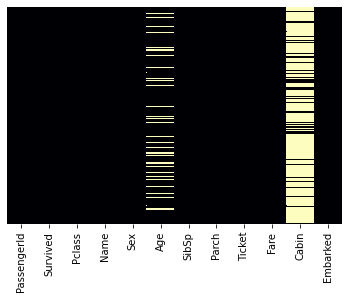

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='magma')

# Análise exploratória de dados

<AxesSubplot:xlabel='Survived', ylabel='count'>

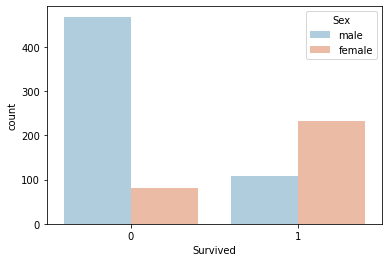

In [11]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

* Mais pessoas morreram do que sobreviveram
* Morreram mais homens do que mulheres

<AxesSubplot:xlabel='Survived', ylabel='count'>

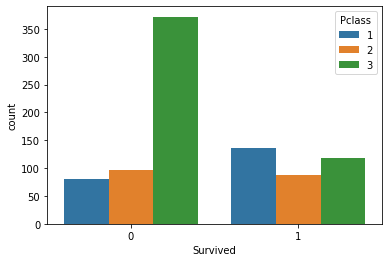

In [10]:
sns.countplot(x='Survived', data=train, hue='Pclass')

* Os que mais morreram foram da 3° classe e os que mais sobreviveram foram da 1° classe

### Distribuição da idade de todos os passageiros do Titanic

<AxesSubplot:xlabel='Age', ylabel='Count'>

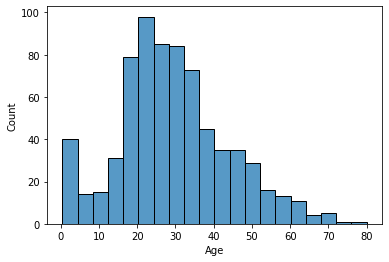

In [14]:
sns.histplot(train['Age'])

* A maioria dos passageiros do Titanic tinha entre 20 e 30 anos

### Distribuição de idade dos passageiros que sobreviveram ao Titanic

<AxesSubplot:xlabel='Age', ylabel='Count'>

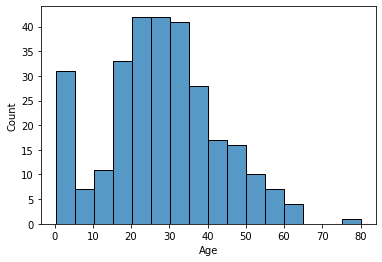

In [20]:
sns.histplot(train[train['Survived'] == 1]['Age'])

* A maioria dos que sobreviveram tinham entre 20 e 30 anos

### Verificar se os passageiros estavam acompanhados ou não

<AxesSubplot:xlabel='SibSp', ylabel='count'>

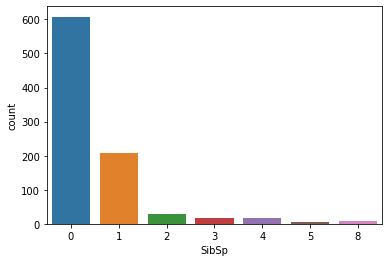

In [21]:
sns.countplot(x='SibSp', data=train)

* A maioria está sozinho no navio

### Distribuição do valor paga nos tickets pelos passageiros

<AxesSubplot:xlabel='Fare', ylabel='Count'>

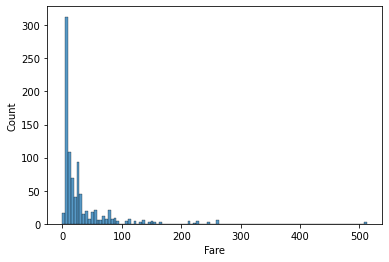

In [22]:
sns.histplot(train['Fare'])

### Distribuição do valor dos tickets que custaram até U\\$ 100

<AxesSubplot:xlabel='Fare', ylabel='Count'>

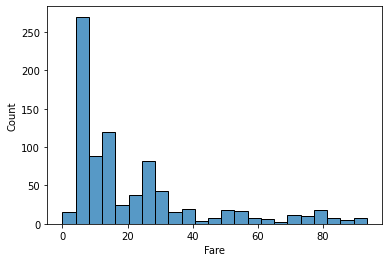

In [26]:
sns.histplot(train[train['Fare'] < 100]['Fare'])

* A maioria das pessoas pagou menos de U\\$ 10

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

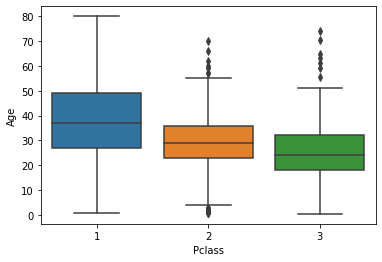

In [3]:
sns.boxplot(x='Pclass', y='Age', data=train)

* Pessoas de melhores classes (1° e 2° classe) em média são mais velhas

## Tratamento dos dados

In [3]:
# Preenche os campos NaN na coluna 'Age'
meanPclassOne = train[train['Pclass'] == 1]['Age'].mean()
meanPclassTwo = train[train['Pclass'] == 2]['Age'].mean()
meanPclassThree = train[train['Pclass'] == 3]['Age'].mean()

def changeNaN(cols, v1=meanPclassOne, v2=meanPclassTwo, v3=meanPclassThree):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return v1
        elif Classe == 2:
            return v2
        else:
            return v3
    else:
        return Idade

* A célula acima primeiramente calcula a média da idade das pessoas da 1° classe, 2° e 3° classe.
* Em seguida, a função 'changeNaN' recebe esses valores e os valores de 2 colunas do DF: a coluna 'Age' e a coluna 'Pclass'
* Então essa função pega os dados faltantes da coluna 'Age' (NaN) e verifica: se a classe da pessoa com idade faltante era a 1° classe, ela então preenche o dado faltando com meanPclassOne, se for 2° preenche com meanPclassTwo e se for 3° classe preenche com meanPclassThree
* A célula abaixo vai pegar essa função e aplicar nas colunas 'Age' e 'Pclass' e substituir a coluna 'Age' do DF

In [4]:
train['Age'] = train[['Age','Pclass']].apply(changeNaN, axis=1)

In [5]:
train['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

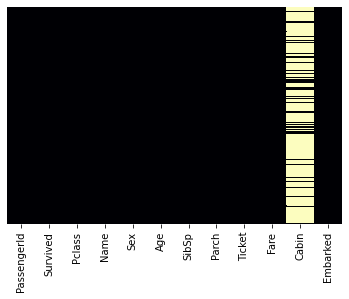

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [7]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

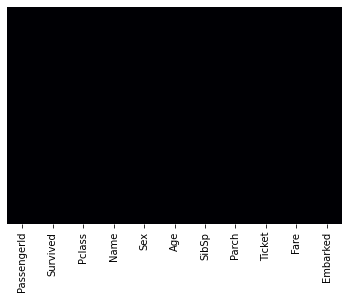

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


* Variáveis que não são importantes no nosso modelo: 'Name' e 'Ticket'. Logo, vamos tratar esses dados
* Nosso modelo interpreta apenas números, então vamos ter que tratar também as variáveis 'Sex' e 'Embarked' antes de começar 

### Tratando 'Sex'

In [9]:
# male == 1
# female == 0
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

### Tratando 'Embarked'

In [10]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# S == 1
# C == 2
# Q == 3

train['Embarked'] = train['Embarked'].apply(lambda x: 1 if x == 'S' else (2 if x == 'C' else 3))

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


* Vamos deletar agora as colunas 'PassengerId', 'Name' e 'Ticket'

In [12]:
train.drop(['PassengerId','Name','Ticket'], inplace=True, axis=1)

In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


## Começando o modelo de Regressão Logística

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

* Vamos dividir nosso dataframe em um grupo de treino e outro de teste
* Variável 'X' do modelo vai ser todas as colunas exceto a coluna 'Survived'
* Variável 'Y' vai ser a coluna 'Survived

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']], train['Survived'], test_size=0.3)

In [16]:
logmodel = LogisticRegression()

logmodel.fit(X_train, Y_train)

/home/guilherme/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
logmodel.coef_

array([[-1.29465346e+00, -2.61881583e+00, -4.45349440e-02,
        -3.49286446e-01, -1.91025606e-01,  2.22462038e-03,
         2.40934250e-01]])

In [24]:
predict = logmodel.predict(X_test)

### Checagem das predições usando métricas para Regressão Logística

* Nesse tipo de regressão não faz sentido analisar a "distância" do erro. O tipo de classificação é categórico, ou seja, ou está certo ou está errado (ou a pessoa morreu, ou sobreviveu)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       164
           1       0.77      0.68      0.72       104

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



* Conclusão: nosso modelo acertou aproximadamente 80% dos casos

### Outro tipo de métrica para esse caso: Matriz de Confusão

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
print(confusion_matrix(Y_test, predict))

[[143  21]
 [ 33  71]]


Matriz de confusão?

| TN: 143 | FP: 21 |
| ------- | ------ |
| FN: 33  | TP: 71 |

#### Precisão: quanto em médio o modelo acerta?

$$
\frac{TN + TP}{total} = \frac{214}{268} = 0.80
$$

#### Classificações incorretas: quanto em média o modelo erra?

$$
\frac{FN + FP}{total} = \frac{54}{268} = 0.20
$$